# Linear Regression with scikit-learn

This notebook creates and measures a linear regression model using sklearn.

* Method: Ordinary Least Squares
* Dataset: Boston housing data

## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
# Load the Boston housing data
boston = load_boston()

In [3]:
# Get more information about the dataset including the feature names and meanings
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# As the dataset is a dict view the keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
# Convert the dict into a Pandas dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Replace the columns with the column names
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Add the target prices to the dataframe
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Fit a Linear Regression Model

* Y = Target variable; Boston housing price
* X = Independent variables; all other features

In [8]:
# Create our feature dataframe by dropping the price column
X = boston_df.drop('PRICE', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Create a linear regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, boston_df.PRICE, test_size=0.33, random_state=5)

In [11]:
# Fit (train) the model with the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Intercept Coefficient**: represents the mean change in the response variable for one unit of change in the predictor variable while holding everything else constant. It isolates the role of one variable from all others.

In [12]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 32.858932634086166


In [13]:
# Number of coefficients: 
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


**Note**: the correlation coefficients (below) give an idea of the strength of the relationship between two variables.

In [14]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
fc_df

,features,coefficients
0,CRIM,-0.156381
1,ZN,0.038549
2,INDUS,-0.025063
3,CHAS,0.786440
4,NOX,-12.946912
5,RM,4.002689
6,AGE,-0.011602
7,DIS,-1.368288
8,RAD,0.341757
9,TAX,-0.013515


**Interpretation**: it appears that there is a high positive correlation between RM and prices.

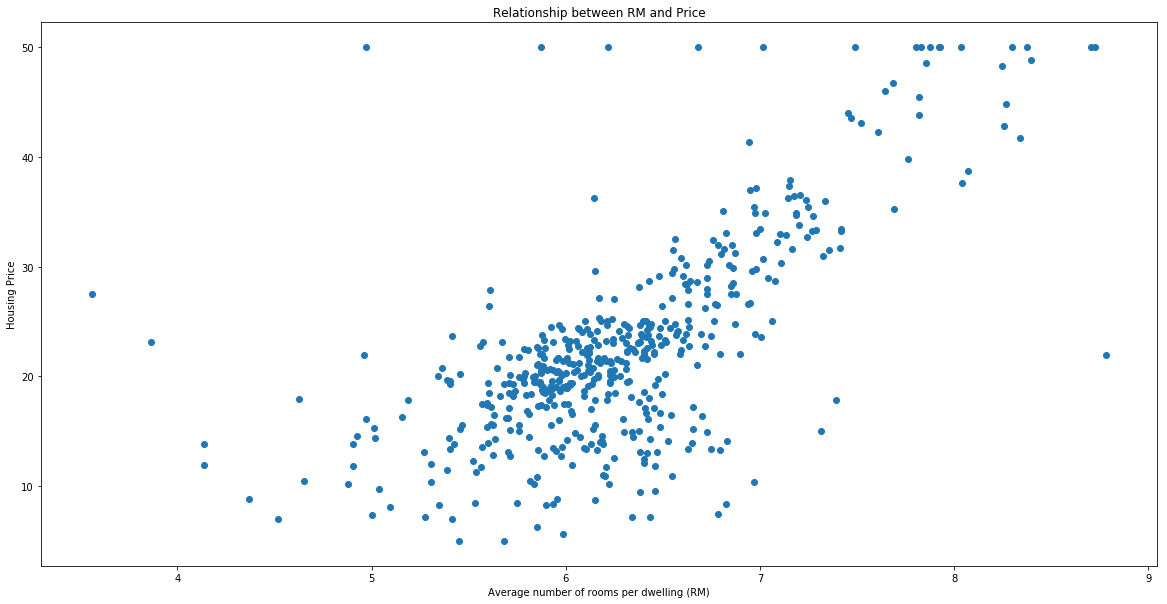

In [15]:
# Create a plot for RM and housing prices
fig = plt.figure(figsize=(20,10))
plt.scatter(boston_df.RM, boston_df.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

## Predict a Price

In [16]:
# Use the test data to create predictions and show the first 5
y_pred = lm.predict(X_test)
y_pred[0:5]

array([37.46723562, 31.39154701, 27.1201962 ,  6.46843347, 33.62966737])

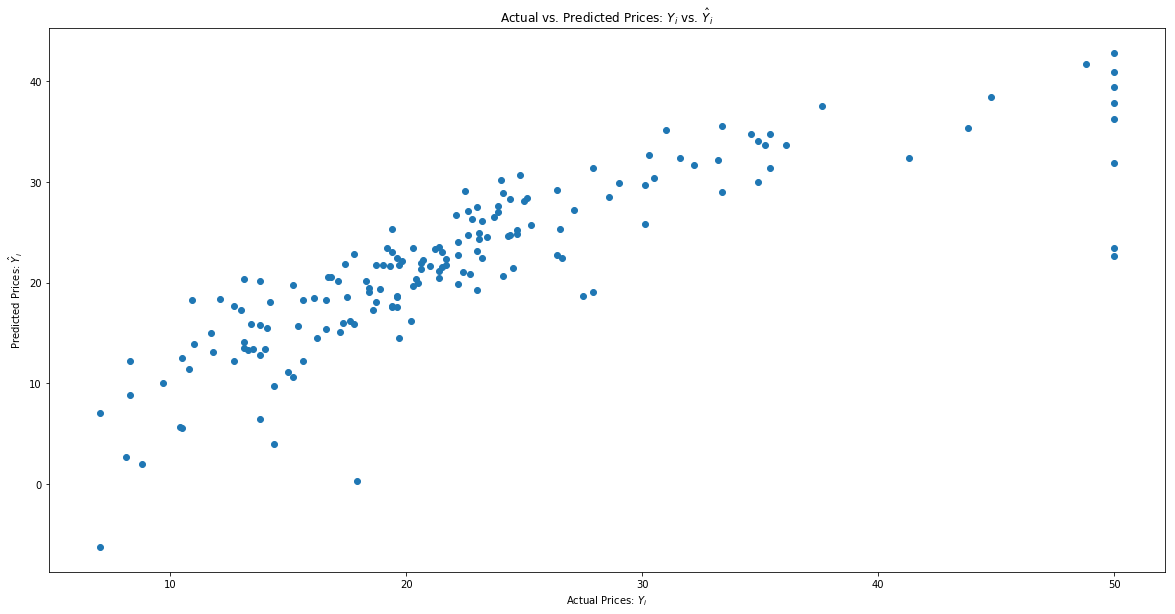

In [17]:
# Create a plot to compare actual prices (Y_test) and the predicted prices (pred_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Actual vs. Predicted Prices: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

**Observation**: there is error in the predictions as the housing price increases

## Model Evaluation

### Mean Squared Error

* A measure of the average magnitude of the errors without consideration for their direction; measures accuracy for continuous variables.
* Always non-negative
* Values closer to zero (0) are better

In [18]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, lm.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 19.54675847353467


In [19]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, lm.predict(X_test))))

MSE Test Data: 28.541367275618278


In [20]:
# Get the MSE for a single feature for comparison
lm2 = LinearRegression()
lm2.fit(X[['PTRATIO']], boston_df.PRICE)

mse2 = mean_squared_error(boston_df.PRICE, lm2.predict(X[['PTRATIO']]))
print("MSE All Data Single Feature: {}".format(mse2))

MSE All Data Single Feature: 62.652200013769274


**Observation**: because the MSE increased for a single feature, this indicates that a single feature is not a good predictor of housing prices.

### Variance (R^2)

* Explains how much of the variability of a factor can be caused or explained by its relationship to another factor; how well the model is predicting.
* A score of 1 means a perfect prediction
* A score of 0 means the model always predicts the expected value of y, disregarding the input features

In [21]:
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: 0.70


### Residual Plot

**Residuals**: the difference between the predictions and the actuals.


**Interpretation**: If the model is working well then the data should be randomly scattered around line zero. If there is structure in the data, that means the model is not capturing something, perhaps interaction between two variables or it's time dependent. Check the parameters of your model.

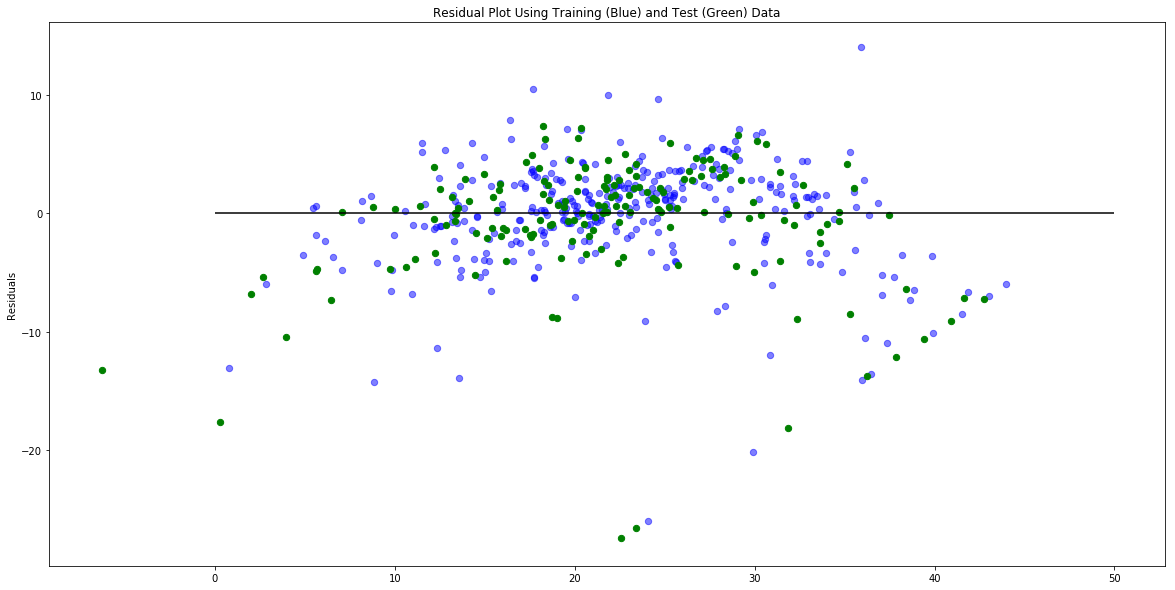

In [22]:
# Create a residual plot
fig = plt.figure(figsize=(20,10))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()